# COGS 108 - Data Checkpoint

## Ava Emami, Joshua Choi, Hattan Halawani, Neha Ayyappan, Kelly Sam

- Ava Emami: Project administration, Software, Review and editing
- Joshua Choi: Software, Analysis, Data Curation
- Hattan Halawani: Research development, Data analysis
- Neha Ayyappan: Hypothesis development, Ethics section, Background review
- Kelly Sam: Background review, Writing and review

## Research Question

How do borrower income, loan-to-income ratio, employment length, home ownership status, loan intent, prior default history, and credit history affect the probability of a loan being defaulted?

The study focuses on the correlation between the binary outcome variable `loan_status`, where `loan_status = 1` indicates a borrower has failed to pay off (defaulted) and `loan_status = 0` indicates repayment as agreed. Utilizing descriptive statistics (such as mean and median), the study will summarize borrower and loan characteristics from the dataset.

The study will also use group comparisons by calculating default rates across many categories including `person_income`, `loan_percent_income`, `person_emp_length`, `person_home_ownership`, `loan_intent`, `cb_person_default_on_file`, and `cb_person_cred_hist_length` to identify differences in default risk.

Finally, we will apply logistic regression to model the probability of loan default as a function of `person_income`, `loan_percent_income`, `person_emp_length`, `person_home_ownership`, `loan_intent`, `cb_person_default_on_file`, and `cb_person_cred_hist_length`, and determine whether these variables significantly affect the probability of `loan_status` being defaulted.


## Background and Prior Work


Credit risk assessment is the fundamental process used by financial institutions to predict the likelihood that a borrower will fail to meet their debt obligation. In the modern economy, lenders have moved away from simple credit score checks toward comprehensive risk modeling that analyzes a combination of “capacity” (a borrower’s ability to pay) and “stability” (their profession and residential history). As financial services become increasingly digitized, research highlights a transition from manual reviews toward automated Machine Learning (ML) and Deep Learning (DL) architectures to identify which specific borrower attributes such as annual income and employment tenure act as the most reliable anchors for financial responsibility [1](https://www.mdpi.com/1911-8074/18/9/520).

Previous work in this field has shown that housing status and the specific intent of a loan are major predictors of default behavior (the failure of a borrower to fulfill their legal obligations to repay a debt according to agreed-upon terms). Research into consumer default has consistently demonstrated that homeowners are statistically less likely to default compared to renters, as property ownership suggests a level of financial stability and collateral that mitigates risk [2](https://pmc.ncbi.nlm.nih.gov/articles/PMC9041570/). Furthermore previous data science projects utilizing credit risk datasets have discovered that "loan intent" acts as a crucial qualitative filter; for instance, loans intended for education or home improvement often have different repayment trajectories than those intended for high-interest debt consolidation. What these earlier projects really showed is that you can't just look at a person’s background by itself; you have to look at their demographics alongside the actual reason they’re taking out the loan in the first place.

Data from the Consumer Financial Protection Bureau (CFPB) shows that a borrower’s age is a major factor in how they handle debt, especially as they transition through different life stages. Their research highlights that younger borrowers often have much higher delinquency rates, likely because they have shorter credit histories and less financial experience compared to older generations/older borrowers [3](https://www.consumerfinance.gov/data-research/consumer-credit-trends/student-loans/lending-borrower-age/). By looking at these age-based trends, we can see that risk isn't just about how much money someone makes, but also where they are in their life and their age. This is really important for our project because it helps explain why younger people who might still be in the early stages of their careers are often flagged as higher risk even if they have a steady income.

To model these outcomes, researchers predominantly utilize Logistic Regression. While more complex algorithms exist, recent literature emphasizes that Logistic Regression remains a preferred tool for credit risk because it provides a "probability score" that is easily interpretable for regulatory audits [1](https://www.mdpi.com/1911-8074/18/9/520). This method allows analysts to see exactly how much specific variables, such as a higher loan-to-income ratio or a change in housing status, mathematically increase the probability of a binary "default" outcome. Our project builds on this existing research by using these established statistical methods to determine the predictive power of income, employment, housing status, and loan intent.

### References

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Nanehkaran, Y. A., et al. (2025). Application of Machine Learning and Deep Learning in Credit Risk Assessment: A Systematic Literature Review. *Journal of Risk and Financial Management*, 18(9), 520. https://www.mdpi.com/1911-8074/18/9/520
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Manso, J. P., et al. (2023). A logistic regression model for consumer default risk. *PMC - National Institutes of Health*. https://pmc.ncbi.nlm.nih.gov/articles/PMC9041570/
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Consumer Financial Protection Bureau. (2025). Student Loan Lending by Borrower Age. *Consumer Credit Trends*. https://www.consumerfinance.gov/data-research/consumer-credit-trends/student-loans/lending-borrower-age/


## Hypothesis


Borrowers with lower annual income, higher loan-to-income percentages, shorter employment length, non-homeownership status, certain loan intents, prior default history, and shorter credit history are more likely to default on loans.

These factors affect the borrower’s overall financial stability and credit risk profile. Lower income and higher loan-to-income percentages indicate greater financial strain, while shorter employment length, non-homeownership status, prior default history, and shorter credit history length suggest increased financial vulnerability. When combined, these factors increase the likelihood that borrowers will miss loan payments and default.

These predictors correspond directly to the dataset variables `person_income`, `loan_percent_income`, `person_emp_length`, `person_home_ownership`, `loan_intent`, `cb_person_default_on_file`, and `cb_person_cred_hist_length`, while `loan_status` represents the binary default outcome.


## Data

### Data overview

- Dataset #1
  - Dataset Name: Credit Risk Dataset
  - Link to the dataset: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
  - Number of observations: 32,581
  - Number of variables: 12
  - Description of the variables most relevant to this project
    - ```person_age```: A person's age in years
    - ```person_income```: A person's annual income is USD
    - ```loan_int_rate```: A person's interest rate (%)
    - ```loan_status```: Our target variable. ```0``` indicates non-default and ```1``` indicates default
    - ```loan_percent_income```: Ratio of loan amount to annual income. This represents the borrower's debt burden.

    - ```person_emp_length```: Borrower's employment length in years. This reflects job stability.

    - ```person_home_ownership```: Borrower's home ownership status (e.g., rent or own). This reflects housing and financial stability.

    - ```loan_intent```: Purpose of the loan. Different loan purposes may have different default risks.

    - ```cb_person_default_on_file```: Indicates whether the borrower has previously defaulted. Prior default history is a strong predictor of future default.

    - ```cb_person_cred_hist_length```: Length of the borrower's credit history in years. This reflects financial experience.

   - Descriptions of any shortcomings this dataset has with respect to the project
      - This dataset contains unrealistic outliers such as ```person_age``` values greater than 100, ```person_emp_length``` values greater than 60, and cases where ```person_emp_length``` exceeds ```person_age − 14```. These outliers must be removed to prevent skewed results. There are also missing values in some variables. We use median imputation for ```loan_int_rate``` because it is less affected by extreme values, and we fill missing ```person_emp_length``` values with 0 when no employment history is recorded. These dataset variables directly correspond to the predictors listed in our research question and hypothesis, and ```loan_status``` represents the default outcome.


In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [2]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries;
# each dict has keys of
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/LeHongNgoc3820/Project_Credit_Risk/main/credit_risk_dataset.csv', 'filename':'credit_risk_dataset.csv'},
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

Successfully downloaded: credit_risk_dataset.csv


### Credit Risk Dataset

The dataset available throgh Kaggle is utilized for its financial and demographic information to predict whether an indivdual would have their loan defaulted (i.e., not paid off). Each row represents a loan applicant and the primary outcome variable (loan_status) indicated whther the borrower has repaid the loan successfully (coded as 0) or defaulted (coded as 1). With this dataset the group sets to structurally utilize supervised machine learning and financial risk modeling to set to see whether the hypothesis of Borrowers with low annual income, higher loan-to-income percentages, shorter employment length, non-homeownership status, certain loan intents, prior default history, and shorter credit history are more likely to default on loans is a correct conclusion to draw from the dataset. This confirms that the dataset is appropriate for answering our research question.

Important Metrics (i.e, variables)

person_age: measured in years. This variable reflects whether the individual securing a loan does have finacial stability as well as credit maturity (i.e., a history of paid off credit to buuild a good credit score) a good credit score indicates income stability. Young Adults (i.e., 18-23) may have limited credit history increasing uncertanty in risk of loan defaulting.

person_income : represented in in annual income in the currency of US Dollar. An individual's income represents a good indicator for repayment capacity. However the individual's income should be looked from the perspective of loan size as outliers (i.e., high reported incomes) may lead to skewed distribution and errors in the data.

loan_amnt : is the loan ammount also represented in US Dollars. Larger loans tend to increase financial burden as repayment additionally often includes interest rates leading to repayment stress. A large loan amount would signifigantly increase the details explained above which would increase likelihood of loans being defaulted.

loan_int_rate : the annual interest rate of a loan represented in percentage,APR. higher interest rates than the avergae of 5-30 %increases the repayment cost and is often assigned to indivudals that are high-risk borrowers. These high interest rates would indicate that these individuals have poor credit history resulting in increased likelihood of loans being defaulted.

loan_percent_income : a ratio found by calculating loan amount / annual income. This metric allows to anaylse debt burden an indicate higher default

loan_grade : categorized from A-G , reflects lender assesed risk level aiding in summarizing multiple financial risk indicators into a single loan risk variable.

cb_person_default_on_file : binary variable (Y/N) indicate whether the indivdual who has taken out a loan before has had that loan defaulted. Previous history of defaulted loans is a strong predicator that furture loans would be defaulted as it reflects a repeated pattern of behavior rather than just financial instability.

There could be a concern of selction bias as the dataset has a likelihood of only having individuals who applied for loans which were then recorded into their system. It excludes indivduals who never applied for credit or who never made past the formal evaluation stage. This would lead to the conclusions that are drawn from this study may not be applicable to the general population.

There is a likelihood if institutional bias when it comes to variable such as loan_grade as well as loan_int_rate as the predictave models built on this dataset may largely reproduce clasic lending decisions rather than the individual factors leading to loan defaults.

The selection bias mentioned previous could result in class imbalance as well as in many modern credit bases non-defaulted loans are much greater than defaulted loans. This leads to the predictive models made may appear accurate to the conclusions with the hypothesis , but failing to detect high risk borrowers

Dataset Size: 32581 rows and 12 columns
Data is tidy with categorical variables

Missing Data Count:
 person_emp_length     895
loan_int_rate        3116
dtype: int64


/var/folders/3n/6_4f2v2s7vn9njwr5tlnm2m80000gn/T/ipykernel_6667/1898201586.py:12: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include=['object']).columns:


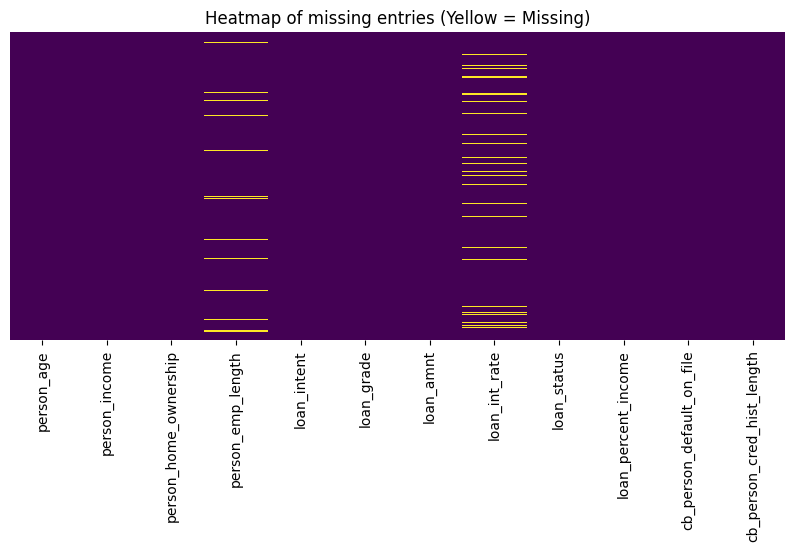


Flagging Weird Entries:
   - Age > 100: 5 cases
   - Emp Length > 60: 2 cases
   - Logical Errors (Emp > Age-14): 2 cases


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
df = pd.read_csv('data/00-raw/credit_risk_dataset.csv')
print(f"Dataset Size: {df.shape[0]} rows and {df.shape[1]} columns")

# make categorical text consistent
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.title()
print("Data is tidy with categorical variables\n")

# Check to see if any data is missing
missing = df.isnull().sum()
print("Missing Data Count:\n", missing[missing > 0])

# Heatmap of missing data entries among variables
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of missing entries (Yellow = Missing)')
plt.show()

# Flag unrealistic outliers / logical errors
suspicious_age = df[df['person_age'] > 100]
suspicious_emp = df[df['person_emp_length'] > 60]
logical_error = df[df['person_emp_length'] > (df['person_age'] - 14)]

print("\nFlagging Weird Entries:")
print(f"   - Age > 100: {len(suspicious_age)} cases")
print(f"   - Emp Length > 60: {len(suspicious_emp)} cases")
print(f"   - Logical Errors (Emp > Age-14): {len(logical_error)} cases")


We standardized categorical text fields to ensure consistency across categories. We also inspected missing values and flagged unrealistic outliers (`person_age` > 100, `person_emp_length` > 60, and `person_emp_length` > `person_age` − 14) to prevent skewed analysis and ensure the dataset accurately reflects realistic borrower characteristics.


In [4]:
# Remove unrealistic outliers / logical errors
df = df[df['person_age'] < 100]
df = df[df['person_emp_length'] < 60]
df = df[df['person_emp_length'] <= (df['person_age'] - 14)]

# Impute missing values
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['person_emp_length'] = df['person_emp_length'].fillna(0)

# Cleaned up data numbers
print(f"\nFinal Cleaned Size: {df.shape[0]} rows")
print(f"Remaining missing values: {df.isnull().sum().sum()}")



Final Cleaned Size: 31679 rows
Remaining missing values: 0


We cleaned the dataset by removing unrealistic outliers and applying logical constraints to ensure valid borrower records. We then handled missing data by imputing `loan_int_rate` with the median (which is robust to skew and outliers) and filling missing `person_emp_length` values with 0 when no employment history was recorded. These steps ensure the dataset is complete, consistent, and suitable for analysis.


In [5]:
# Summary statistics
print("\nSummary Statistics for Important Variables:")
display(df[['person_age', 'person_income', 'loan_int_rate', 'person_emp_length']].describe())

# Export cleaned dataset
os.makedirs('data/02-processed', exist_ok=True)
df.to_csv('data/02-processed/credit_risk_clean.csv', index=False)
print("\nClean data saved to data/02-processed/credit_risk_clean.csv!!!!")



Summary Statistics for Important Variables:


,person_age,person_income,loan_int_rate,person_emp_length
count,31679.000000,3.167900e+04,31679.000000,31679.000000
mean,27.730673,6.649010e+04,11.034921,4.782064
std,6.213427,5.276879e+04,3.070205,4.034948
min,20.000000,4.000000e+03,5.420000,0.000000
25%,23.000000,3.936600e+04,8.490000,2.000000
50%,26.000000,5.600000e+04,10.990000,4.000000
75%,30.000000,8.000000e+04,13.160000,7.000000
max,94.000000,2.039784e+06,23.220000,41.000000



Clean data saved to data/02-processed/credit_risk_clean.csv!!!!


These summary statistics confirm that key variables such as `person_income`, `loan_int_rate`, and `person_emp_length` contain meaningful variation across borrowers. Additionally, `loan_status` includes both defaulted (`1`) and non-defaulted (`0`) cases, confirming that the dataset contains the necessary outcome variation to analyze loan default risk. Therefore, the cleaned dataset is appropriate for modeling and will be used in future steps to test our hypothesis and answer our research question.


## Ethics

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### A. Data Collection
 - [x] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?

> This project uses a publicly available, secondary dataset. Our team did not collect data directly from human subjects, so informed consent was not obtained by us. We assume informed consent and ethical data collection practices were handled by the original data providers.

 - [x] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
> We acknowledge that collection bias may exist if certain borrower groups, such as higher income or more stable employment groups, are overrepresented in the dataset. This may limit how well the results generalize to all borrowers, so findings are interpreted cautiously.

 - [x] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
> The dataset doesn't contain direct personally identifiable information such as names, addresses, or identification numbers. All variables used are anonymized and relevant to the analysis, minimizing exposure to PII.

 - [x] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

> The dataset doesn't include protected attributes such as race or gender, which limits our ability to test downstream bias across these groups. We acknowledge this limitation and avoid making claims about fairness across unobserved protected classes.

### B. Data Storage
- [x] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
> The data used in this project comes from open-source Kaggle datasets and does not contain sensitive or private information. We store the data locally and in GitHub/Colab environments, which already include standard access controls.

- [x] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
> Since the datasets are publicly available and fully anonymized, there is no direct way to trace data back to an individual. If a dataset were removed from Kaggle, we would stop using it.

- [x] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?
> The data is only kept for the duration of this class project. After the project is complete, the local copies can be deleted since the original data remains publicly available on Kaggle.
### C. Analysis
- [x] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
> The analysis is based on available loan and borrower data and does not directly include perspectives from borrowers or lenders. Because of this, some real-world factors behind loan default may not be fully captured, and results are interpreted with this limitation in mind.

- [x] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
> Loan default is less common than repayment, which creates class imbalance in the dataset. Some potentially important factors, such as full credit history, are also not included, which may affect the results.

- [x] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
> Our visualizations and summary statistics are created to reflect the data accurately.

- [x] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
> The dataset is anonymized and does not include personally identifiable information. All analysis is done at an aggregate level without exposing individual data points.

- [x] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?
> The analysis is documented in a notebook with clear code and explanations, making it possible to rerun or review the process if issues are found later.

### D. Modeling
- [x] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
> The model uses variables such as income, employment length, home ownership, and loan intent. While these factors may indirectly relate to sensitive attributes, they are included to study patterns in loan default and not to make judgments about individuals.

- [x] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
> Comparisons are made across available groups in the data, such as loan intent and home ownership status. However, fairness testing is limited because protected attributes like race or gender are not included.

- [x] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
> Since the outcome variable is binary, appropriate classification metrics are used. Class imbalance is also considered when evaluating model performance.

- [x] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
> Logistic regression is used so that the relationship between input variables and loan default can be explained in a clear and interpretable way.

- [x] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?
> Limitations such as missing variables, potential bias, and dataset constraints are clearly discussed alongside the model results.

### E. Deployment
- [x] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
> This model is not deployed in a real-world setting and is only used for this class project. If it were to be deployed, regular monitoring and review would be needed to ensure performance stays reasonable over time.

- [x] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
> In a real application, loan decisions should involve human review and a way for individuals to question or appeal outcomes. This helps reduce harm from incorrect or unfair predictions.

- [x] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
> Any real deployment should allow the model to be turned off or replaced if issues such as bias or poor performance are discovered.

- [x] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?
> A possible unintended use would be applying the model directly to loan approval decisions. Since the model is built using limited features and open data, using it without proper safeguards could lead to unfair outcomes.

## Team Expectations

* **Team Expectation 1: Communication Structure**  
We will communicate primarily through iMessage and expect responses within 24 hours. We will meet on Zoom weekly or as needed to discuss progress and next steps.

* **Team Expectation 2: Respectful Tone**  
We agree to communicate in a respectful, direct, and constructive manner. Feedback will focus on ideas and work rather than individuals.

* **Team Expectation 3: Decision Making**  
All major decisions will be made through group discussion and voting. If someone is unresponsive when a decision must be made, the group will move forward based on a majority vote and update them afterward.

* **Team Expectation 4: Task Assignment and Effort**  
Tasks will be assigned clearly and evenly. While members may focus on different areas, everyone is expected to contribute across all parts of the project, including coding, writing, and editing.

* **Team Expectation 5: Planning and Deadlines**  
We will set deadlines for each part of the project and review progress regularly during meetings. Plans may be adjusted as needed.

* **Team Expectation 6: Addressing Difficulties**  
If a team member is struggling with a task, they will communicate early so the group can adjust responsibilities and provide support.


## Project Timeline Proposal





| Meeting Date | Meeting Time | Completed Before Meeting | Discuss at Meeting |
|---|---|---|---|
| 2/2 | 1 PM Meeting | Brainstorm topic ideas; review project requirements | Discuss and decide on final project topic; assign group responsibilities; discuss hypothesis |
| 2/4 | Before 11:59 PM | Edit, finalize, and submit proposal | Proposal submitted |
| 2/12 | 4pm Meeting | Review TA Feedback and next steps; Finalize dataset and analysis approach | Discuss dataset details; prepare for Checkpoint 1 |
| 2/18 | Before 11:59 PM | NA | Review and submit Checkpoint 1 |
| 2/25 to 3/2 | Meeting TBD | Exploratory data analysis and visualizations | Review/Edit wrangling, code, EDA, and visualizations; discuss analysis approach |
| 3/4 | Before 11:59 PM | NA | Review and submit Checkpoint 2 |
| 3/11 to 3/16 | Meeting TBD | Continue analysis, coding, and visualizations; draft results and discussion | Discuss/edit analysis, code, visualizations, and prepare final project |
| 3/18 | Before 11:59 PM | NA | Turn in Final Project & Group Project Surveys |